In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.
cwd = os.getcwd()

In [ ]:
df = pd.read_csv(cwd+"/train.csv", index_col='id', parse_dates=['fecha'])

In [ ]:
df.loc[df['tipodepropiedad'] == 'Casa en condominio', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df = df[df['tipodepropiedad'] == 'Casa'].copy()
df = df[df['provincia'] == 'Distrito Federal'].copy()

In [ ]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'habitaciones'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre habitaciones totales y precio de casas en DF")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

In [ ]:
#import calendar
#df2 = df.copy()
#df2 = df2.loc[(df2['fecha'] < '2016-12')]
#df2['fecha'] = df2['fecha'].dt.month
#listaDeMeses = list(calendar.month_abbr)
#listaDeMeses.pop(0)
#g = df2['fecha'].value_counts().sort_index().plot(kind='bar',figsize=(15, 5))
#g.set_xticklabels(listaDeMeses,rotation=90);
#df2['fecha'].value_counts()

In [ ]:
import calendar
df2 = df.copy()
df2 = df2.loc[(df2['fecha'] < '2016-12')]
df2['anio'] = df2['fecha'].dt.year
df2['mes'] = df2['fecha'].dt.month
df2['aux'] = 1
listaDeMeses = list(calendar.month_abbr)
listaDeMeses.pop(0)
grupo = df2.groupby(['anio','mes'])['aux']
plt.figure(figsize=(15, 7))
g = sns.heatmap(grupo.count().unstack(), square=True, annot=True, fmt='.2f')
g.set_xticklabels(listaDeMeses,rotation=90);
g.set_title('Heatmap de Publicaciones Por Mes y Anio')

In [ ]:
df2 = df.copy()

In [ ]:
df2['contienePrecio'] = df2['descripcion'].str.contains('precio')
df2['contieneVista'] = df2['descripcion'].str.contains('vista')
df2['contieneUbicacion'] = df2['descripcion'].str.contains('ubicacion|zona|ubicación',regex=True)
df2['contieneTamanio'] = df2['descripcion'].str.contains('tamaño|espacio|tamano|tamanio',regex=True)

In [ ]:
df2['contieneTamanio'].value_counts()

In [ ]:
def llenarDiccionario(diccionario,descripcion):
    for palabra in descripcion.split():
        palabra = palabra.replace(',','').strip()
        diccionario[palabra] = diccionario.get(palabra,0) + 1
        
def generarDiccionario(df2):
    dicc = {}
    for descripcion in df2['descripcion']:
        if isinstance(descripcion,str): llenarDiccionario(dicc,descripcion)
    return dicc

def limpiarDiccionario(dicc):
    stringDeAdjetivos = urllib.request.urlopen('https://www.solosequenosenada.com/gramatica/spanish/listado/lista_01_adjetivos.php').read().decode("cp1251")
    palabrasARemover = []
    palabrasAIgnorar = ['principal','cuarto','medio','amplia','amplios','completos','trasero','horizontal','comercial']
    for palabra in dicc.keys():
        if len(palabra) <= 3 or palabra in palabrasAIgnorar or (not ('\n'+palabra+' ') in stringDeAdjetivos): palabrasARemover.append(palabra)
    for palabra in palabrasARemover:
        dicc.pop(palabra)
            

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import urllib
dicc = generarDiccionario(df2)
limpiarDiccionario(dicc)
print("15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES")
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(dicc)
plt.figure(figsize=(11, 11))
plt.imshow(wc)

In [ ]:
df.sample(4)

In [ ]:
path = "/home/andres/Desktop/Trabajo Practico/train.csv"
df3 = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [ ]:
df3.head(5)

In [ ]:
df3['aux'] = 1
group = df3.groupby('provincia')['aux']
df4 = group.count().reset_index()
df4.head()

In [ ]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")

In [ ]:
geoframe.sample(5)

In [ ]:
geoframe.plot(figsize=(12,12))

In [ ]:
merge = geoframe.merge(df4,left_on='ESTADO',right_on='provincia')

In [ ]:
merge.head()

In [ ]:
geoplot = merge.plot(figsize=(12,12),column='aux',legend=True,cmap='viridis')
#for location,label in zip(merge.geometry, merge.ESTADO):
    #geoplot.annotate(label, xy=(1,1),xycoords=location, xytext=(3, 3), textcoords="offset points")
#plt.show()

In [ ]:
df5 = pd.read_csv('/home/andres/Desktop/ubicaciones.txt')
df5.head()

In [ ]:
merge2 = merge.merge(df5,on="ESTADO")
merge2.head()

In [ ]:
geoplot2 = merge2.plot(figsize=(12,12),column='aux',legend=True,cmap='viridis')
for longitud,latitud,label in zip(merge2.Longitud,merge2.Latitud, merge2.ESTADO):
    geoplot2.annotate(label, xy=(longitud,latitud), xytext=(3, 3), textcoords="offset points")
plt.show()

In [105]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")

In [106]:
df6 = df.copy()
df6['preciom2'] = df6.precio/df6.metrostotales
group6 = df6.groupby('provincia')['preciom2'].mean()
df6_1 = group6.reset_index()

In [142]:
merge6 = geoframe.merge(df6_1,left_on="ESTADO",right_on="provincia")

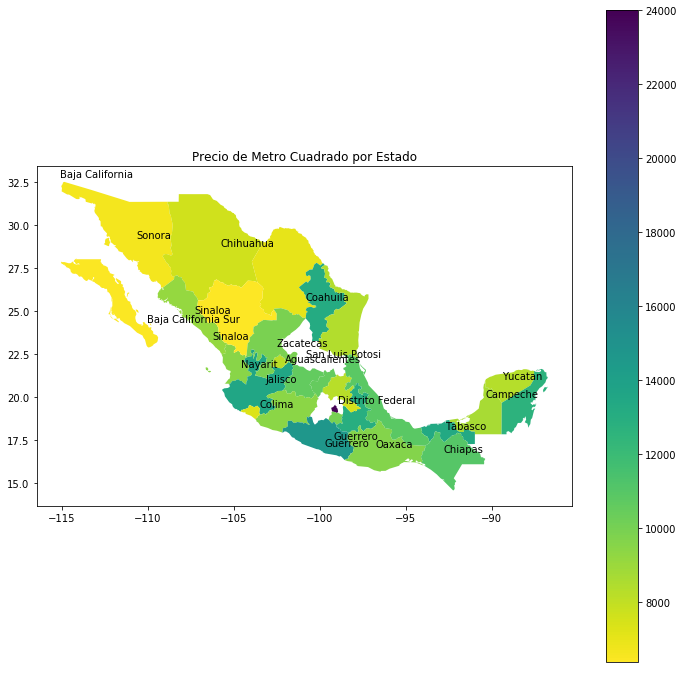

In [148]:
geoplot6 = merge6.plot(figsize=(12,12),column='preciom2',legend=True,cmap='viridis_r')
plt.title("Precio de Metro Cuadrado por Estado")
for locacion,label in zip(geoframeCiudadesFiltrado.geometry, geoframeCiudadesFiltrado.STATE_NAME):
    geoplot6.annotate(label, xy=(locacion.x,locacion.y), xytext=(3, 3), textcoords="offset points")
plt.show()

In [125]:
geoframeCiudades = gpd.read_file("/home/andres/Desktop/mexCiudades")

In [137]:
estados_a_filtrar = ["Morelos","Veracruz","Puebla","Hidalgo","Guanajuato","Durango",
                     "Queretaro","Nuevo Leon","Quintana Roo","Tamaulipas","Tlaxcala","Michoacan","Mexico"]
def filtrar(x):
    return x not in estados_a_filtrar

geoframeCiudades['aFiltrar'] = geoframeCiudades['STATE_NAME'].apply(filtrar)
geoframeCiudadesFiltrado = geoframeCiudades[geoframeCiudades['aFiltrar']]
#geoframeCiudades.head(25)

#geoframeCiudadesFiltrado.head(50)
geoframeCiudadesFiltrado.head(40)

,NAME,CAPITAL,STATE_NAME,geometry,aFiltrar
1,Mazatlan,N,Sinaloa,POINT (-106.4160690307617 23.20383262634277),True
2,Guadalajara,Y,Jalisco,POINT (-103.3437957763672 20.67359161376953),True
4,Mexico City,C,Distrito Federal,POINT (-99.12757110595703 19.42704582214355),True
7,Oaxaca,Y,Oaxaca,POINT (-96.95134735107422 16.90743064880371),True
8,Merida,Y,Yucatan,POINT (-89.55286407470703 20.82186889648438),True
9,Mexicali,Y,Baja California,POINT (-115.2942352294922 32.62020492553711),True
10,Aguascalientes,Y,Aguascalientes,POINT (-102.1863403320312 21.85334777832031),True
11,Campeche,Y,Campeche,POINT (-90.54466247558594 19.80398750305176),True
12,La Paz,Y,Baja California Sur,POINT (-110.2538604736328 24.1898307800293),True
13,Tuxtla Gutierrez,Y,Chiapas,POINT (-92.99516296386719 16.63029670715332),True


In [90]:
merge7.drop('geometry_x',axis=1)

,NAME,CAPITAL,STATE_NAME,aFiltrar,CODIGO,ESTADO,geometry_y,provincia,preciom2
0,Mazatlan,N,Sinaloa,True,MX25,Sinaloa,"POLYGON ((-105.402099609375 23.06745910644531,...",Sinaloa,9168.73
1,Guadalajara,Y,Jalisco,True,MX14,Jalisco,"POLYGON ((-101.52490234375 21.85663986206055, ...",Jalisco,13570.91
2,Tampico,N,Tamaulipas,True,MX28,Tamaulipas,POLYGON ((-97.17221832275391 25.95456886291504...,Tamaulipas,8399.85
3,Mexico City,C,Distrito Federal,True,MX09,Distrito Federal,POLYGON ((-99.28486633300781 19.14244079589844...,Distrito Federal,24011.41
4,Oaxaca,Y,Oaxaca,True,MX20,Oaxaca,POLYGON ((-96.75063323974609 18.43083000183105...,Oaxaca,9647.17
5,Merida,Y,Yucatan,True,NaN,NaN,NaN,NaN,nan
6,Mexicali,Y,Baja California,True,NaN,NaN,NaN,NaN,nan
7,Aguascalientes,Y,Aguascalientes,True,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...,Aguascalientes,8191.79
8,Campeche,Y,Campeche,True,MX04,Campeche,(POLYGON ((-91.83445739746094 18.6380538940429...,Campeche,8697.07
9,La Paz,Y,Baja California Sur,True,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,6485.00


AttributeError: Unknown property column

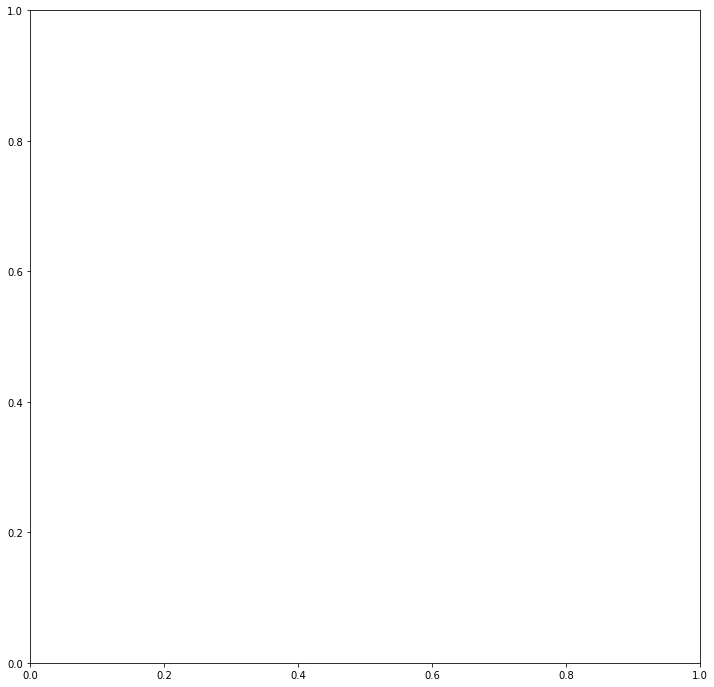

In [95]:
geoplot7 = merge7.plot(figsize=(12,12),column='preciom2',legend=True,cmap='viridis_r')
#for locacion,label in zip(geoframeCiudadesFiltrado.geometry, geoframeCiudadesFiltrado.STATE_NAME):
   # geoplot7.annotate(label, xy=(locacion.x,locacion.y), xytext=(3, 3), textcoords="offset points")
#plt.show()